# Analysis_4   disaster of Titanic

## Analysis the fare related survival

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Load data

In [4]:
raw_data = pd.read_csv('..\data\Titanic.csv',na_values='N/A')  #,index_col=0
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# keep the needed attributes
deal_data = raw_data[['PassengerId','Survived','Pclass','Fare']]
deal_data.head()

,PassengerId,Survived,Pclass,Fare
0,1,0,3,7.2500
1,2,1,1,71.2833
2,3,1,3,7.9250
3,4,1,1,53.1000
4,5,0,3,8.0500


In [14]:
deal_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Fare           0
dtype: int64

In [11]:
# Cut the fare into 5 bins (using quantitle)
deal_data['FareBand'] = pd.qcut(deal_data['Fare'],5)
deal_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Fare,FareBand
0,1,0,3,7.2500,"[0, 7.854]"
1,2,1,1,71.2833,"(39.688, 512.329]"
2,3,1,3,7.9250,"(7.854, 10.5]"
3,4,1,1,53.1000,"(39.688, 512.329]"
4,5,0,3,8.0500,"(7.854, 10.5]"


In [12]:
deal_data[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending = True)

,FareBand,Survived
0,"[0, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


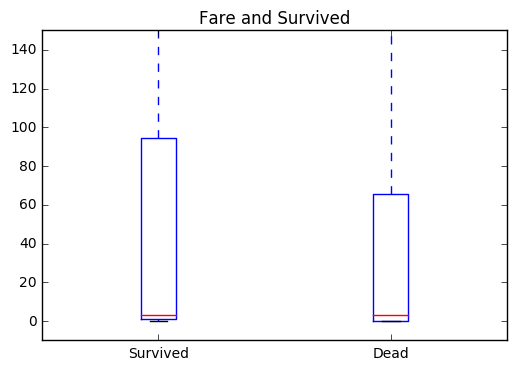

In [20]:
# Draw the relation between fare and survival

fare_1 = deal_data[deal_data['Survived'] == 1]
fare_0 = deal_data[deal_data['Survived'] == 0]
plt.boxplot((fare_1,fare_0),labels=('Survived','Dead'))
plt.ylim([-10,150])
plt.title("Fare and Survived")
#So the higher the price, the more rescured
plt.savefig('Fare_survival.png')

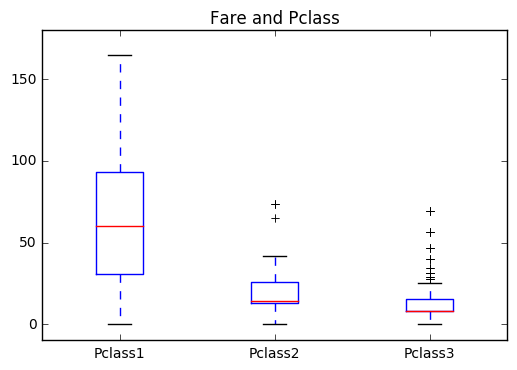

In [19]:
# Draw fare with class

fare1 = deal_data.Fare[deal_data.Pclass == 1]
fare2 = deal_data.Fare[deal_data.Pclass == 2]
fare3 = deal_data.Fare[deal_data.Pclass == 3]
plt.boxplot((fare1,fare2,fare3),labels=("Pclass1","Pclass2","Pclass3"))
plt.ylim([-10,180])
plt.title("Fare and Pclass")
plt.savefig('Fare_Pclass.png')

In [22]:

final_draw1 = pd.crosstab(deal_data.Survived,deal_data.Pclass,margins=True)
final_draw1

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [23]:
final_draw2 = pd.crosstab(deal_data.Survived,deal_data.Pclass,margins=True).apply(lambda x: x/float(x[-1]))
final_draw2

Pclass,1,2,3,All
Survived,,,,
0,0.37037,0.527174,0.757637,0.616162
1,0.62963,0.472826,0.242363,0.383838
All,1.00000,1.000000,1.000000,1.000000


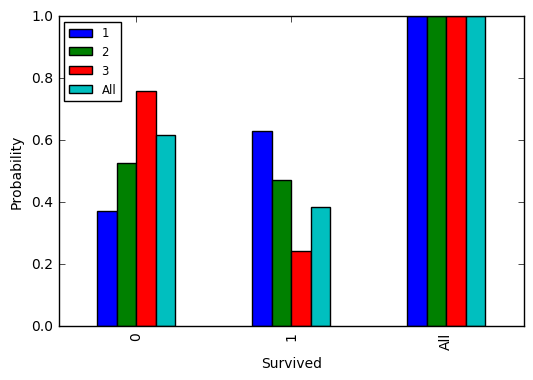

In [24]:
# To find the relation between survival and Class
fig = plt.figure(figsize=(12,12))
fig.set(alpha= 0.2)
final_draw2.plot(kind = 'bar')
plt.ylabel('Probability')
plt.legend(loc = 'upper left',fontsize='small')
plt.savefig("Class_Survival_comparison.png")